In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_price = pd.read_csv('./house_price.csv')
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
featureWithMissingValues = [feature for feature in house_price.columns 
                            if house_price[feature].dtypes == 'O' 
                            and house_price[feature].isnull().sum()>=1]
featureWithMissingValues

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
for ele in featureWithMissingValues:
    print(f"{ele} has {np.around(house_price[ele].isnull().mean()*100, 3)}% of missing values")

Alley has 93.767% of missing values
MasVnrType has 0.548% of missing values
BsmtQual has 2.534% of missing values
BsmtCond has 2.534% of missing values
BsmtExposure has 2.603% of missing values
BsmtFinType1 has 2.534% of missing values
BsmtFinType2 has 2.603% of missing values
Electrical has 0.068% of missing values
FireplaceQu has 47.26% of missing values
GarageType has 5.548% of missing values
GarageFinish has 5.548% of missing values
GarageQual has 5.548% of missing values
GarageCond has 5.548% of missing values
PoolQC has 99.521% of missing values
Fence has 80.753% of missing values
MiscFeature has 96.301% of missing values


In [5]:
for ele in featureWithMissingValues:
    house_price[ele] = house_price[ele].fillna("Not Available")
house_price[featureWithMissingValues].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [6]:
featureWithMissingValues_numerical = [feature for feature in house_price.columns if house_price[feature].dtypes != 'O' and house_price[feature].isnull().sum() >= 1]
featureWithMissingValues_numerical

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [7]:
for feature in featureWithMissingValues_numerical:
    print(f"{feature} has {np.around(house_price[feature].isnull().mean()*100, 3)}% missing values")

LotFrontage has 17.74% missing values
MasVnrArea has 0.548% missing values
GarageYrBlt has 5.548% missing values


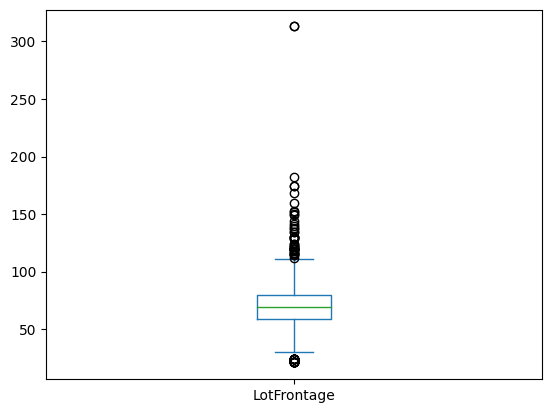

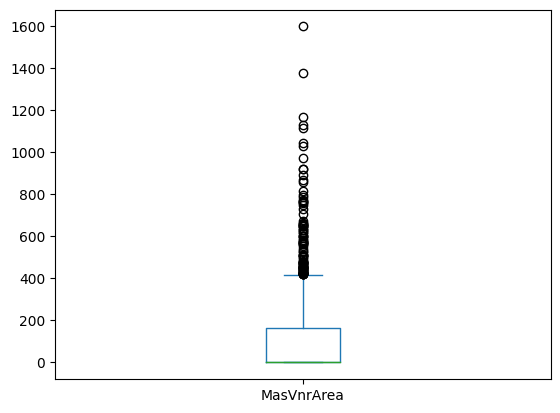

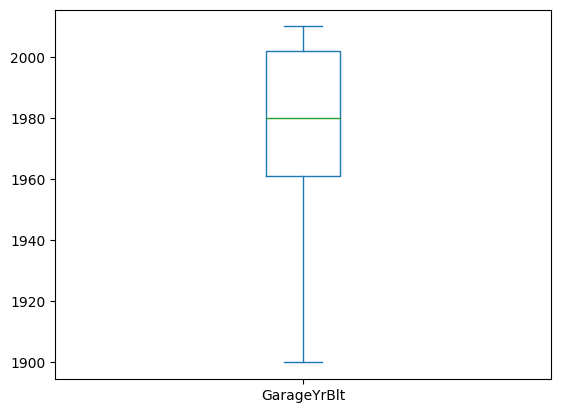

In [8]:
# Box plot for the numerical features to identify outliers

for feature in featureWithMissingValues_numerical:
    house_price[feature].plot(kind='box')
    plt.show()

In [9]:
for feature in featureWithMissingValues_numerical:
    house_price[feature].fillna(house_price[feature].median(), inplace=True)
house_price[featureWithMissingValues_numerical].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [10]:
house_price.isna().sum().sum()

0

In [11]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    house_price[feature] = house_price['YrSold'] - house_price[feature]

In [12]:
features = [feature for feature in house_price.columns if house_price[feature].dtypes == 'O']
for feature in features:
    contribution = (house_price[feature].value_counts()/len(house_price[feature]) * 100)
    contriLessThan1 = [contri for contri in contribution.index if contribution[contri] < 1]
    # print(contriLessThan1)
    house_price[feature] = np.where(house_price[feature].isin(contriLessThan1), "Insignificant", house_price[feature])

for feature in features:
    print(house_price[feature].unique())
    

['RL' 'RM' 'Insignificant' 'FV' 'RH']
['Pave' 'Insignificant']
['Not Available' 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'Insignificant']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'Insignificant']
['Inside' 'FR2' 'Corner' 'CulDSac' 'Insignificant']
['Gtl' 'Mod' 'Insignificant']
['CollgCr' 'Insignificant' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst'
 'NWAmes' 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW'
 'IDOTRR' 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr'
 'Blmngtn' 'BrDale' 'SWISU']
['Norm' 'Feedr' 'PosN' 'Artery' 'Insignificant' 'RRAn']
['Norm' 'Insignificant']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' 'Insignificant' 'SFoyer' 'SLvl']
['Gable' 'Hip' 'Insignificant']
['CompShg' 'Insignificant']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'Insignificant']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Insignificant']
['BrkFace' 'None' 'S

One-hot encoding Steps

In [13]:
categories_encoded = pd.DataFrame()
features = [feature for feature in house_price.columns if house_price[feature].dtypes == 'O']
for feature in features:
    categories_encoded = pd.concat([categories_encoded, pd.get_dummies(house_price[feature], drop_first=True)], axis='columns')
categories_encoded

,Insignificant,RH,RL,RM,Pave,Not Available,Pave,IR2,Insignificant,Reg,...,Not Available,Not Available,Shed,Insignificant,New,WD,Family,Insignificant,Normal,Partial
0,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
1456,0,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1457,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1458,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0


In [14]:
categories_encoded = categories_encoded.drop(['Not Available', 'Insignificant'], axis='columns')
categories_encoded

,RH,RL,RM,Pave,Pave,IR2,Reg,HLS,Low,Lvl,...,P,Y,GdWo,MnPrv,Shed,New,WD,Family,Normal,Partial
0,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1456,0,1,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1457,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1458,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [15]:
for feature in features:
    house_price.drop(feature, axis='columns', inplace=True)
house_price = pd.concat([house_price, categories_encoded], axis='columns')
house_price

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,P,Y,GdWo,MnPrv,Shed,New,WD,Family,Normal,Partial
0,1,60,65.0,8450,7,5,5,5,196.0,706,...,0,1,0,0,0,0,1,0,1,0
1,2,20,80.0,9600,6,8,31,31,0.0,978,...,0,1,0,0,0,0,1,0,1,0
2,3,60,68.0,11250,7,5,7,6,162.0,486,...,0,1,0,0,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,91,36,0.0,216,...,0,1,0,0,0,0,1,0,0,0
4,5,60,84.0,14260,8,5,8,8,350.0,655,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,8,7,0.0,0,...,0,1,0,0,0,0,1,0,1,0
1456,1457,20,85.0,13175,6,6,32,22,119.0,790,...,0,1,0,1,0,0,1,0,1,0
1457,1458,70,66.0,9042,7,9,69,4,0.0,275,...,0,1,0,0,1,0,1,0,1,0
1458,1459,20,68.0,9717,5,6,60,14,0.0,49,...,0,1,0,0,0,0,1,0,1,0
